<a href="https://colab.research.google.com/github/Abhinavsai13/stock-price-prediction/blob/main/stock_predection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM


In [ ]:
# ---------------------------
# Function to create dataset
# ---------------------------
def create_dataset(dataset, time_step=1):
    X, Y = [], []
    for i in range(len(dataset) - time_step - 1):
        X.append(dataset[i:(i + time_step), 0])
        Y.append(dataset[i + time_step, 0])
    return np.array(X), np.array(Y)


In [ ]:
# ---------------------------
# Main function
# ---------------------------
def train_and_predict_stock(symbol, start_date='2010-01-01', end_date='2024-01-01',
                            future_days=30, time_step=100, epochs=100):

    print(f"Fetching data for: {symbol}")
    df = yf.download(symbol, start=start_date, end=end_date)

    if df.empty:
        print(f"Error: No data found for {symbol}.")
        return

    df1 = df['Close']


In [ ]:
    # Scaling
    scaler = MinMaxScaler(feature_range=(0, 1))
    df1_scaled = scaler.fit_transform(np.array(df1).reshape(-1, 1))

    # Train/test split
    training_size = int(len(df1_scaled) * 0.65)
    test_data = df1_scaled[training_size:]
    train_data = df1_scaled[:training_size]

    X_train, y_train = create_dataset(train_data, time_step)
    X_test, y_test = create_dataset(test_data, time_step)

    X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
    X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:

    # Model
    model = Sequential()
    model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
    model.add(LSTM(50, return_sequences=True))
    model.add(LSTM(50))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=epochs, batch_size=64, verbose=1)


In [ ]:
    # Predictions
    train_predict = model.predict(X_train)
    test_predict = model.predict(X_test)

    train_predict = scaler.inverse_transform(train_predict)
    test_predict = scaler.inverse_transform(test_predict)

    print("Train RMSE:", math.sqrt(mean_squared_error(y_train, train_predict)))
    print("Test RMSE:", math.sqrt(mean_squared_error(y_test, test_predict)))

    # Plot predictions
    look_back = time_step
    trainPredictPlot = np.empty_like(df1_scaled)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict

    testPredictPlot = np.empty_like(df1_scaled)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1_scaled)-1, :] = test_predict

    plt.figure(figsize=(12, 6))
    plt.plot(scaler.inverse_transform(df1_scaled), label="Actual Price")
    plt.plot(trainPredictPlot, label="Train Prediction")
    plt.plot(testPredictPlot, label="Test Prediction")
    plt.title(f"{symbol} Price Prediction with LSTM")
    plt.legend()
    plt.show()


/tmp/ipython-input-2-2971765541.py:30: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df = yf.download(symbol, start=start_date, end=end_date)
[*********************100%***********************]  1 of 1 completed

Fetching data for: INFY
Epoch 1/100



/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 167ms/step - loss: 0.0048 - val_loss: 0.0081
Epoch 2/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 204ms/step - loss: 2.4259e-04 - val_loss: 0.0024
Epoch 3/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 197ms/step - loss: 1.8932e-04 - val_loss: 0.0022
Epoch 4/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 177ms/step - loss: 1.7244e-04 - val_loss: 0.0015
Epoch 5/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 1.7534e-04 - val_loss: 0.0026
Epoch 6/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 165ms/step - loss: 1.6258e-04 - val_loss: 0.0012
Epoch 7/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 1.4697e-04 - val_loss: 0.0013
Epoch 8/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 1.3928e-04 - val_loss: 0.0014
Epoch 9/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 191ms/step - loss: 1.3787e-04 - val_loss: 0.0011
Epoch 10/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 5s 150ms/step - loss: 1.2117e-04 - val_loss: 0.0021
Epoch 11/100
35/35 ━━━━━━━━━━━━━━━━━━━━ 11s 165ms/step - loss: 1.4294e-04 - val_loss: 0.0011
Epo

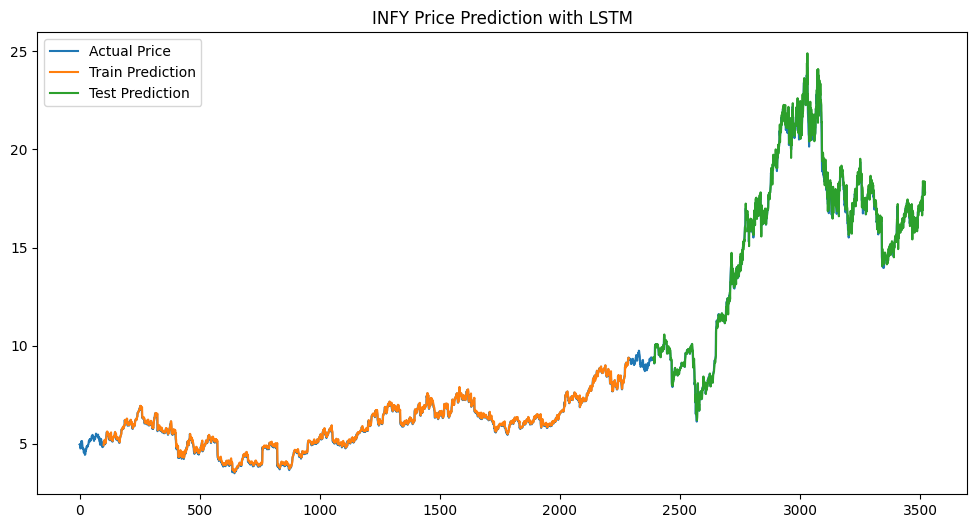

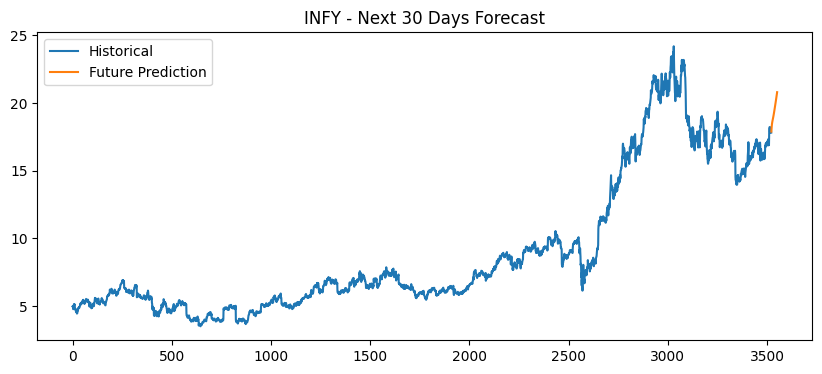

In [ ]:





    # Future forecasting
    temp_input = test_data[-time_step:].reshape(1, -1)[0].tolist()
    lst_output = []

    i = 0
    while i < future_days:
        x_input = np.array(temp_input[-time_step:]).reshape(1, time_step, 1)
        yhat = model.predict(x_input, verbose=0)
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0])
        i += 1

    # Plot future prediction
    future_plot = np.arange(len(df1), len(df1) + future_days)
    plt.figure(figsize=(10, 4))
    plt.plot(np.arange(len(df1)), scaler.inverse_transform(df1_scaled), label="Historical")
    plt.plot(future_plot, scaler.inverse_transform(lst_output), label="Future Prediction")
    plt.title(f"{symbol} - Next {future_days} Days Forecast")
    plt.legend()
    plt.show()


train_and_predict_stock("INFY")  # You can change to any ticker, like "TSLA", "INFY", etc.
